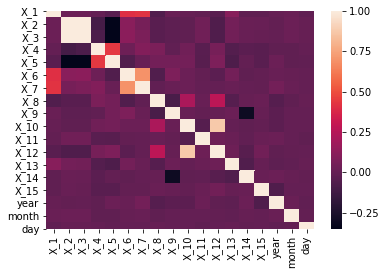

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 17 23:31:58 2020

@author: Kaush
"""
################## Importing all the libraries #################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns


################ Reading data sets ############################
data_train = pd.read_csv("Dataset/train.csv")
data_test = pd.read_csv("Dataset/test.csv")

Y = data_train.MULTIPLE_OFFENSE
X = data_train.drop(columns = 'MULTIPLE_OFFENSE')


############################## Preposessing Data #########################

X.drop(columns = 'INCIDENT_ID', inplace = True)
Incident_id = data_test.INCIDENT_ID
data_test.drop(columns = 'INCIDENT_ID', inplace = True)

X['DATE'] = pd.to_datetime(X['DATE'])   
X['year'] = X.DATE.dt.year
X['month'] = X.DATE.dt.month
X['day'] = X.DATE.dt.day
X.drop(columns = 'DATE', inplace =True)

data_test['DATE'] = pd.to_datetime(data_test['DATE'])   
data_test['year'] = data_test.DATE.dt.year
data_test['month'] = data_test.DATE.dt.month
data_test['day'] = data_test.DATE.dt.day
data_test.drop(columns = 'DATE', inplace =True)


X.astype({'X_1':np.int8, 'X_2':np.int8, 'X_3':np.int8, 'X_4':np.int8, 'X_5':np.int8, 'X_6':np.int8, 'X_7':np.int8, 'X_8':np.int8, 'X_9':np.int8, 'X_10':np.int8}).dtypes
X.astype({'X_11': np.int16, 'X_13':np.int8, 'X_14':np.int8, 'X_15':np.int8, 'month': np.int8, "day": np.int8, 'year': np.int16})


X.X_12.fillna(1, inplace=True)
data_test.X_12.fillna(1, inplace=True)


########################## Removing dependent variables ############################
sns.heatmap(X.corr())

X.drop('X_2', inplace=True, axis=1)
data_test.drop('X_2', inplace=True, axis=1)



##########################Spliting train test data #########################
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75, random_state=10)




In [18]:

########################### GradientBoostingClassifier with default parameters #############################

gbm = GradientBoostingClassifier( loss = 'exponential')

hypara = {'learning_rate' : [0.01, 0.05, 0.1], 'n_estimators' : [500, 1000, 2000], 'max_depth' : [7, 9, 11], 'max_features' : ['auto', 'sqrt', 'log2']}

gbm.fit(X_train, Y_train)
y_predict = gbm.predict(X_test)
print(confusion_matrix(Y_test, y_predict))

predict = gbm.predict(data_test)
d = {'INCIDENT_ID': Incident_id, 'MULTIPLE_OFFENSE': predict}
submission_test = pd.DataFrame(d)
submission_test.to_csv("submission_gbm.csv", index=False)




[[  760    32]
 [   15 17085]]


In [19]:
recall_score(Y_test, y_predict)

0.9991228070175439

In [20]:
#################################### XGBClassification #########################
xgb = XGBClassifier(n_jobs=-1 )

hypara = {'learning_rate' : [0.01, 0.05, 0.1], 'max_depth' : [7, 9, 11]}

gsm = GridSearchCV(xgb, hypara, n_jobs=-1)
gsm.fit(X_train, Y_train)

y_predict = gsm.predict(X_test)

print(confusion_matrix(Y_test, y_predict))


predict_gsmm = gsm.predict(data_test)
d = {'INCIDENT_ID': Incident_id, 'MULTIPLE_OFFENSE': predict_xgb}
submission_test_gsm = pd.DataFrame(d)
submission_test_gsm.to_csv("submission_gsm.csv", index=False)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[  756    36]
 [   27 17073]]


In [21]:
recall_score(Y_test, y_predict)

0.998421052631579